Q1. What is the purpose of grid search cv in machine learning, and how does it work?

Grid Search CV (Cross-Validation) is a method used in machine learning to optimize hyperparameters of a model. The purpose of Grid Search CV is to find the best combination of hyperparameters for a given model to improve its performance.

### How It Works:

1. **Define the Hyperparameter Grid**: Specify a range of values for each hyperparameter you want to optimize. This forms a grid of possible parameter values. For instance, if you are tuning a support vector machine (SVM), you might specify ranges for parameters like `C` (regularization) and `gamma` (kernel coefficient).

2. **Cross-Validation**: For each combination of hyperparameters in the grid, the model is trained and evaluated using cross-validation. Cross-validation involves splitting the dataset into multiple folds (e.g., 5 or 10), training the model on some folds and validating it on the remaining folds.

3. **Evaluation**: The performance of the model for each combination of hyperparameters is evaluated using a chosen metric (e.g., accuracy, F1 score). The model's performance is averaged over all folds of the cross-validation process.

4. **Select the Best Parameters**: The combination of hyperparameters that yields the best performance (according to the chosen metric) is selected as the optimal set of hyperparameters.

5. **Train the Final Model**: With the best hyperparameters identified, the model is retrained on the entire dataset using these optimal parameters.

### Example:
Suppose you are using a decision tree model and want to optimize the `max_depth` and `min_samples_split` parameters. You define a grid with possible values for these parameters:

- `max_depth`: [10, 20, 30]
- `min_samples_split`: [2, 5, 10]

Grid Search CV will evaluate all combinations of these values (i.e., 3 × 3 = 9 combinations) using cross-validation to determine which combination gives the best performance.

Overall, Grid Search CV helps in systematically exploring the hyperparameter space and ensures that you select the best possible set of parameters for your model.

To demonstrate how to use Grid Search CV to optimize hyperparameters for a decision tree model, you can follow the example below. This example uses the scikit-learn library in Python.

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:

# Load a sample dataset (Iris dataset)
data = load_iris()
X = data.data
y = data.target

In [3]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [4]:
# Define the model
model = DecisionTreeClassifier()


In [5]:
# Define the parameter grid
param_grid = {
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

In [6]:
# Set up Grid Search CV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

In [7]:
# Fit Grid Search to the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [8]:
# Output the best parameters and the best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

Best Parameters: {'max_depth': 10, 'min_samples_split': 10}
Best Score: 0.9428571428571428


In [9]:
# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy}")
]

Test Accuracy: 1.0


Q2. Describe the difference between grid search cv and randomize search cv, and when might you choose
one over the other?

Certainly! Let's explore the differences between **GridSearchCV** and **RandomizedSearchCV** for hyperparameter tuning:

1. **GridSearchCV**:
   - **Search Space**: Grid search evaluates the model's performance on a predefined grid of hyperparameters.
   - **Exploration Method**: It systematically explores all possible combinations of hyperparameters.
   - **Usage Scenario**:
     - When you have a **small search space** with a few hyperparameters.
     - When you want to **exhaustively evaluate** all combinations.
     - Useful when you have **prior knowledge** about the hyperparameters².
   - **Pros**:
     - Guarantees that all combinations are tested.
     - Provides a clear overview of performance across the entire grid.

2. **RandomizedSearchCV**:
   - **Search Space**: Randomized search samples hyperparameters randomly from a distribution.
   - **Exploration Method**: It explores the same hyperparameter space but in a **random order**.
   - **Usage Scenario**:
     - When you have a **large search space** with many hyperparameters.
     - When you want to **efficiently explore** diverse combinations.
     - Useful when you don't have specific prior beliefs about hyperparameters.
   - **Pros**:
     - Faster than grid search due to random sampling.
     - Good for **initial exploration** of hyperparameters¹.

In summary, choose **GridSearchCV** for a small, well-defined search space, and **RandomizedSearchCV** for larger spaces or when you lack specific prior knowledge. Both methods aim to find optimal hyperparameters for your model.

Let's use Python's scikit-learn library to demonstrate both Grid Search CV and Randomized Search CV. We’ll use a simple machine learning example with a classification problem.

## 1. Grid Search CV


In [1]:

from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [2]:
# Load dataset
data = load_iris()
X = data.data
y = data.target


In [3]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [4]:
# Define model
model = RandomForestClassifier()


In [5]:
# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

In [6]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)


In [7]:
grid_search

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             verbose=2)

In [8]:
# Fit the model
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             verbose=2)

In [9]:
# Best parameters and model
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_


Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}


In [10]:
# Evaluate model
y_pred = best_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


##2. Randomized Search CV


In [11]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define hyperparameter distribution
param_dist = {
    'n_estimators': randint(50, 150),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 10)
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist,
                                    n_iter=20, cv=5, n_jobs=-1, verbose=2, random_state=42)

# Fit the model
random_search.fit(X_train, y_train)

# Best parameters and model
print("Best Parameters:", random_search.best_params_)
best_model = random_search.best_estimator_

# Evaluate model
y_pred = best_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 142}
Accuracy: 1.0


Q3. What is data leakage, and why is it a problem in machine learning? Provide an example.

**Data leakage** refers to the situation where information from outside the training dataset is inadvertently used to create the model, leading to overly optimistic performance estimates. This typically occurs when the model has access to information it wouldn’t have in a real-world scenario, resulting in unrealistic performance metrics and poor generalization to unseen data.

### **Why Data Leakage is a Problem**

1. **Overestimated Model Performance**: The model appears to perform much better on training or validation data than it would in a real-world scenario, as it has had access to information that it shouldn't have had.
  
2. **Poor Generalization**: The model fails to generalize well to new, unseen data because it has been trained with information that would not be available in practice.

3. **Misleading Evaluation**: It can lead to incorrect conclusions about the effectiveness of different models or algorithms, as the performance metrics are not indicative of how the model will perform on real data.

### **Example of Data Leakage**

Consider a scenario where you are building a model to predict whether a patient has a certain disease based on various medical tests. You have a dataset with features such as age, gender, test results, and a label indicating whether the patient has the disease.

**Example of Leakage**:
- **Feature Leakage**: Suppose one of the features in your dataset is a medical test result that is only conducted after a diagnosis is confirmed (e.g., a specialized test performed after the disease is diagnosed). Including this feature in your model would lead to data leakage because the result of this test is directly related to the diagnosis. In practice, you wouldn't have this test result when making a prediction about a patient who hasn't been diagnosed yet.

**How to Avoid Data Leakage**:

1. **Separate Data Properly**: Ensure that the training, validation, and test sets are strictly separated. Data transformations or preprocessing steps should be applied consistently across these sets without any overlap.

2. **Feature Engineering**: Be cautious when creating new features. Ensure that they do not include information that would not be available at the time of prediction.

3. **Validation Process**: Use techniques like cross-validation correctly, ensuring that the validation set is never used in the training process.

4. **Time Series Data**: For time series data, ensure that future information is not included in the training set, as it can lead to unrealistic performance estimates.

By addressing these issues, you can avoid data leakage and build models that generalize better to new, unseen data.

## Scenario: Data Leakage Example
Suppose we have a dataset with features that include a "future feature" that we mistakenly include in the training process, which causes data leakage.



## 1. Generate the Synthetic Dataset


In [27]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create synthetic data
X, y = make_classification(n_samples=1000, n_features=4, random_state=42)

# Add a feature that is a direct function of the target variable (simulating leakage)
leakage_feature = y + np.random.normal(0, 0.1, size=y.shape)  # Slightly noisy target variable
X = np.hstack([X, leakage_feature.reshape(-1, 1)])

# Define feature names
feature_names = [f"feature_{i}" for i in range(X.shape[1] - 1)] + ['leakage_feature']

# Create DataFrame
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

# Split data
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.3, random_state=42)


## 2. Model with Data Leakage


In [28]:
# Train model including the leakage feature
model_with_leakage = RandomForestClassifier(random_state=42)
model_with_leakage.fit(X_train, y_train)

# Evaluate
y_pred_with_leakage = model_with_leakage.predict(X_test)
accuracy_with_leakage = accuracy_score(y_test, y_pred_with_leakage)
print("Accuracy with data leakage:", accuracy_with_leakage)


Accuracy with data leakage: 1.0


## 3. Model Without Data Leakage


In [29]:
# Remove the leakage feature and retrain the model
X_train_no_leak = X_train.drop('leakage_feature', axis=1)
X_test_no_leak = X_test.drop('leakage_feature', axis=1)

model_no_leakage = RandomForestClassifier(random_state=42)
model_no_leakage.fit(X_train_no_leak, y_train)

# Evaluate
y_pred_no_leakage = model_no_leakage.predict(X_test_no_leak)
accuracy_no_leakage = accuracy_score(y_test, y_pred_no_leakage)
print("Accuracy without data leakage:", accuracy_no_leakage)


Accuracy without data leakage: 0.9366666666666666


Q4. How can you prevent data leakage when building a machine learning model?

Preventing data leakage is crucial for building reliable machine learning models. Here are some key strategies to avoid data leakage:

1. **Proper Train-Test Split**: Ensure that your data is split into training and testing sets before any preprocessing. This prevents the model from being exposed to test data during training.

2. **Feature Engineering**: Perform feature engineering only on the training set, and then apply the same transformations to the test set. For example, if you're normalizing or scaling features, fit the scaler on the training set and apply it to both the training and test sets.

3. **Time Series Data**: For time series data, ensure that future information does not leak into the training set. For instance, if you're predicting future stock prices, your training set should only contain historical data available up to a certain point in time.

4. **Cross-Validation**: Use proper cross-validation techniques. Ensure that the validation sets in cross-validation do not include any information from the training set.

5. **Avoid Using Data from Future**: In cases where you have features derived from future events (e.g., future stock prices), ensure that these features are not included in the training process.

6. **Careful Handling of Target Leakage**: Ensure that the features used to train the model do not directly or indirectly include information from the target variable.

7. **Separate Data for Feature Selection**: If performing feature selection, do it within the training data and apply the selected features to the test data.

8. **Validation Strategies**: Use techniques like nested cross-validation to prevent information from leaking between training and validation sets.

By following these practices, you can help ensure that your model's performance reflects its true predictive power and not just its ability to exploit leakage in the data.

## Example of Data Leakage with Feature Engineering Using California Housing Data


using the California housing dataset, showcasing how to avoid data leakage with feature engineering

In [36]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [37]:
# Load the California housing dataset
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='MedHouseVal')


In [38]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [39]:
y

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [42]:
# Simulate feature engineering that causes leakage
X['MedHouseVal'] = y  # Adding target variable as a feature


In [43]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [44]:
# Initialize the scaler
scaler = StandardScaler()


In [45]:
# Fit the scaler on the training data (excluding the leakage feature)
scaler.fit(X_train.drop(columns='MedHouseVal'))


StandardScaler()

In [46]:
# Apply scaling to training and test sets (excluding the leakage feature)
X_train_scaled = X_train.drop(columns='MedHouseVal').copy()
X_test_scaled = X_test.drop(columns='MedHouseVal').copy()


In [47]:
X_train_scaled = scaler.transform(X_train_scaled)
X_test_scaled = scaler.transform(X_test_scaled)


In [48]:
# Add the 'MedHouseVal' feature back (leakage)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns[:-1])
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns[:-1])


In [49]:
X_train_scaled['MedHouseVal'] = y_train.values
X_test_scaled['MedHouseVal'] = y_test.values


In [50]:
# Train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

In [51]:
# Make predictions and evaluate the model
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error with data leakage: {mse:.2f}")


Mean Squared Error with data leakage: 0.00


## Correct Approach


In [52]:
# Correct approach
# Remove the target feature before scaling
X_train_scaled = scaler.transform(X_train.drop(columns='MedHouseVal'))
X_test_scaled = scaler.transform(X_test.drop(columns='MedHouseVal'))


In [53]:
# Train the model without the target feature
model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

In [54]:
# Make predictions and evaluate the model
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error without data leakage: {mse:.2f}")


Mean Squared Error without data leakage: 0.53


## Explanation
* Leakage Scenario: We incorrectly add the target variable (MedHouseVal) as a feature, which directly leaks information into the model.
* Correct Approach: We avoid adding the target variable as a feature, ensuring the model is trained without any information leakage.







Q5. What is a confusion matrix, and what does it tell you about the performance of a classification model?

A **confusion matrix** is a crucial tool in evaluating the performance of a classification model. Let's break it down:

1. **What is a Confusion Matrix?**
   - It's a matrix summarizing a machine learning model's performance on a set of test data.
   - The matrix displays the number of accurate and inaccurate predictions based on the model's output.
   - It's commonly used for classification models that predict categorical labels.

2. **Components of the Confusion Matrix:**
   - **True Positive (TP):** Correctly predicted positive outcomes.
   - **True Negative (TN):** Correctly predicted negative outcomes.
   - **False Positive (FP):** Incorrectly predicted positive outcomes (Type I error).
   - **False Negative (FN):** Incorrectly predicted negative outcomes (Type II error).

3. **Why Do We Need It?**
   - Beyond basic accuracy, the confusion matrix provides insights into recall, precision, and overall effectiveness.
   - Especially useful when dealing with imbalanced class distributions.

4. **Metrics Based on Confusion Matrix:**
   - **Accuracy:** Ratio of correct predictions to total instances.
     - $$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$
   - **Precision:** Measures accuracy of positive predictions.
     - $$\text{Precision} = \frac{TP}{TP + FP}$$

Remember, understanding the confusion matrix helps fine-tune models and improve their performance.



A confusion matrix is a tool used to evaluate the performance of a classification model by summarizing the results of a classification problem. It displays the counts of true and false predictions, categorized by their actual and predicted labels. The matrix is usually organized as follows:

- **True Positive (TP)**: The number of instances correctly classified as positive.
- **True Negative (TN)**: The number of instances correctly classified as negative.
- **False Positive (FP)**: The number of instances incorrectly classified as positive.
- **False Negative (FN)**: The number of instances incorrectly classified as negative.

The confusion matrix looks like this:

|                  | Predicted Positive | Predicted Negative |
|------------------|--------------------|--------------------|
| **Actual Positive**   | TP                 | FN                 |
| **Actual Negative**   | FP                 | TN                 |

From the confusion matrix, you can calculate several performance metrics:

- **Accuracy**: \((TP + TN) / (TP + TN + FP + FN)\) — the proportion of total correct predictions.
- **Precision**: \(TP / (TP + FP)\) — the proportion of true positives among all positive predictions.
- **Recall (Sensitivity)**: \(TP / (TP + FN)\) — the proportion of true positives among all actual positives.
- **F1 Score**: \(2 \cdot (Precision \cdot Recall) / (Precision + Recall)\) — the harmonic mean of precision and recall.
- **Specificity**: \(TN / (TN + FP)\) — the proportion of true negatives among all actual negatives.

Each of these metrics provides insights into different aspects of the model’s performance, such as how well it identifies positive cases or avoids false positives.

 Here's a Python program using scikit-learn to demonstrate the use of a confusion matrix for evaluating a classification model.
 In this example, we'll use the Iris dataset, train a simple classifier (like a logistic regression model), and then compute and display the confusion matrix along with key performance metrics.



In [55]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt


In [56]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target



In [57]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [58]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [59]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [60]:
# Train a logistic regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)


LogisticRegression(max_iter=200)

In [61]:
# Make predictions
y_pred = model.predict(X_test)


In [62]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)


In [63]:
cm

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]])

In [64]:
# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


In [65]:
# Display metrics
print("Confusion Matrix:")
print(cm)
print(f"\nAccuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


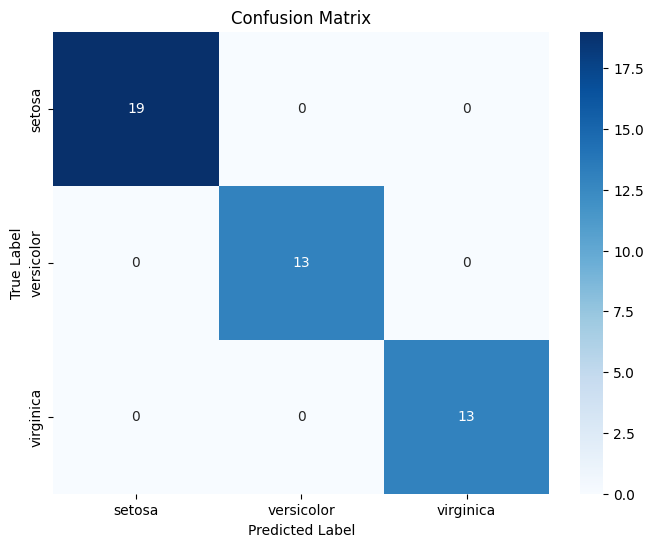

In [66]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


Q6. Explain the difference between precision and recall in the context of a confusion matrix.

In the context of a confusion matrix, precision and recall are two key metrics used to evaluate the performance of a classification model.

1. **Precision**: Precision measures the accuracy of the positive predictions. Specifically, it is the ratio of true positives (TP) to the sum of true positives and false positives (FP). In other words, it tells you how many of the predicted positive cases are actually positive.

   \[
   \text{Precision} = \frac{TP}{TP + FP}
   \]

   High precision means that when the model predicts a positive class, it is likely to be correct.

2. **Recall**: Recall (also known as Sensitivity or True Positive Rate) measures how well the model identifies positive instances. It is the ratio of true positives to the sum of true positives and false negatives (FN). This tells you how many of the actual positive cases were correctly identified by the model.

   \[
   \text{Recall} = \frac{TP}{TP + FN}
   \]

   High recall means that the model is good at finding all the positive instances, but it might also include some false positives.

### Example

Consider a confusion matrix for a binary classification problem:

\[
\begin{array}{ccc}
 & \text{Predicted Positive} & \text{Predicted Negative} \\
\text{Actual Positive} & TP & FN \\
\text{Actual Negative} & FP & TN \\
\end{array}
\]

- **Precision**: Focuses on the proportion of predicted positives that are actually positive. If a model has high precision, it means that the false positive rate is low.
  
- **Recall**: Focuses on the proportion of actual positives that were correctly predicted. If a model has high recall, it means that it successfully identifies most of the positive instances, even if it includes some false positives.

### Trade-off

Precision and recall often have an inverse relationship, meaning that improving one can reduce the other. For example, increasing the threshold for classifying a positive case might improve precision but reduce recall, and vice versa.

To evaluate precision and recall using a confusion matrix in Python, you can use libraries like scikit-learn which provide built-in functions to compute these metrics. Below is a Python program that demonstrates how to calculate precision and recall from a confusion matrix using scikit-learn.



In [67]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
# Example data: actual labels and predicted labels
y_true = [1, 0, 1, 1, 0, 1, 0, 0, 1, 0]  # Actual labels
y_pred = [1, 0, 1, 0, 0, 1, 1, 0, 1, 1]  # Predicted labels


In [68]:
# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[3 2]
 [1 4]]


In [69]:
# Extract true positives, false positives, false negatives, true negatives
TP = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
TN = cm[0, 0]


In [70]:
# Compute precision and recall
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)


In [71]:
print(f"\nPrecision: {precision}")
print(f"Recall: {recall}")



Precision: 0.6666666666666666
Recall: 0.8


In [72]:
# Alternatively, you can compute precision and recall manually using the confusion matrix
manual_precision = TP / (TP + FP) if (TP + FP) > 0 else 0
manual_recall = TP / (TP + FN) if (TP + FN) > 0 else 0


In [73]:
print(f"\nManual Precision: {manual_precision}")
print(f"Manual Recall: {manual_recall}")



Manual Precision: 0.6666666666666666
Manual Recall: 0.8


Q7. How can you interpret a confusion matrix to determine which types of errors your model is making?

A confusion matrix is a useful tool for understanding the performance of a classification model. It shows how many instances of each class were correctly or incorrectly predicted. Here’s how you can interpret it to determine the types of errors your model is making:

### Basic Structure
A confusion matrix typically looks like this for a binary classification problem:

```
                 Predicted
                 Positive   Negative
Actual Positive    TP         FN
       Negative    FP         TN
```

Where:
- **TP** (True Positive): Correctly predicted positive instances.
- **TN** (True Negative): Correctly predicted negative instances.
- **FP** (False Positive): Incorrectly predicted positive instances (Type I error).
- **FN** (False Negative): Incorrectly predicted negative instances (Type II error).

### Interpreting Errors
1. **False Positives (FP)**:
   - These occur when the model predicts a positive class incorrectly. For example, if you’re classifying whether an email is spam and it’s not but your model classifies it as spam, that’s a false positive. High FP may suggest the model is too lenient or not properly distinguishing between classes.

2. **False Negatives (FN)**:
   - These occur when the model fails to predict a positive class when it is indeed positive. For instance, if a spam email is classified as not spam, that’s a false negative. High FN may indicate that the model is too conservative or missing key features that differentiate the classes.

### Metrics Derived from Confusion Matrix
- **Precision**: `Precision = TP / (TP + FP)` — How many of the predicted positives are actually positive? High precision means fewer false positives.
  
- **Recall (Sensitivity)**: `Recall = TP / (TP + FN)` — How many of the actual positives were correctly predicted? High recall means fewer false negatives.

- **F1 Score**: `F1 = 2 * (Precision * Recall) / (Precision + Recall)` — The harmonic mean of precision and recall, providing a single measure of model performance.

- **Accuracy**: `Accuracy = (TP + TN) / (TP + TN + FP + FN)` — The proportion of correct predictions overall.

- **Specificity**: `Specificity = TN / (TN + FP)` — How many of the actual negatives were correctly predicted? High specificity means fewer false positives.

### Visualization
In multi-class classification, the matrix expands to show each class against each class, which helps identify which classes are often confused with each other.

By analyzing these metrics and errors, you can adjust your model to better handle the types of errors that are most costly or problematic in your application.

Here’s a Python program that demonstrates how to compute and interpret a confusion matrix for a classification problem using scikit-learn. This example uses a sample dataset, trains a simple classifier, and then computes and visualizes the confusion matrix.



In [74]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay


In [81]:
# Load dataset
data = load_iris()
X = data.data
y = data.target
labels = data.target_names



In [82]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [83]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [84]:
# Train a simple classifier
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)


LogisticRegression(max_iter=200)

In [85]:
# Make predictions
y_pred = model.predict(X_test)


In [86]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=np.arange(len(labels)))


In [87]:
# Compute classification report
report = classification_report(y_test, y_pred, target_names=labels)


In [88]:
# Print classification report
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



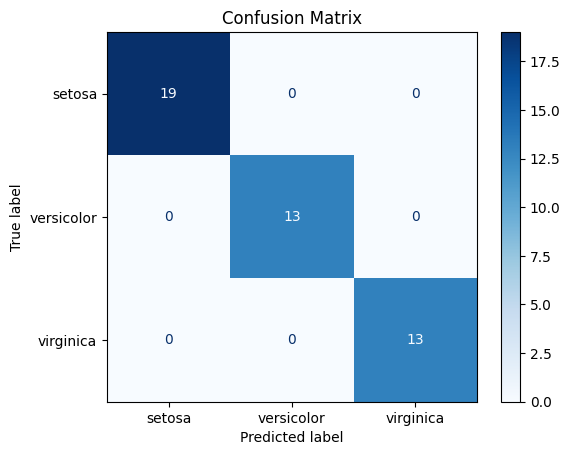

In [89]:
# Visualize confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


Q8. What are some common metrics that can be derived from a confusion matrix, and how are they
calculated?

Certainly! A **confusion matrix** is a powerful tool for evaluating classification models. Let's explore some common metrics derived from it:

1. **Accuracy**:
   - Measures overall correctness: $$\frac{{TP + TN}}{{TP + TN + FP + FN}}$$

2. **Precision (Positive Predictive Value)**:
   - Proportion of true positive predictions among all positive predictions: $$\frac{{TP}}{{TP + FP}}$$

3. **Recall (Sensitivity, True Positive Rate)**:
   - Proportion of true positive predictions among all actual positive instances: $$\frac{{TP}}{{TP + FN}}$$

4. **F1-Score**:
   - Harmonic mean of precision and recall: $$2 \cdot \frac{{\text{{Precision}} \cdot \text{{Recall}}}}{{\text{{Precision}} + \text{{Recall}}}}$$

5. **Specificity (True Negative Rate)**:
   - Proportion of true negative predictions among all actual negative instances: $$\frac{{TN}}{{TN + FP}}$$

6. **ROC Curve and AUC**:
   - ROC curve plots true positive rate (recall) against false positive rate at various thresholds.
   - AUC (Area Under the Curve) summarizes the ROC curve performance.

Remember, these metrics help you understand different aspects of your model's performance



To compute the metrics derived from a confusion matrix, you can write a Python program using libraries like scikit-learn and numpy.
Below is a sample program to calculate these metrics given a confusion matrix:



In [93]:
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, matthews_corrcoef

def calculate_metrics(y_true, y_pred):
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()  # Assumes binary classification

    # Calculate metrics
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    specificity = tn / (tn + fp)
    false_positive_rate = fp / (fp + tn)
    false_negative_rate = fn / (fn + tp)
    mcc = matthews_corrcoef(y_true, y_pred)

    # Print metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"False Positive Rate: {false_positive_rate:.4f}")
    print(f"False Negative Rate: {false_negative_rate:.4f}")
    print(f"Matthews Correlation Coefficient: {mcc:.4f}")

# Example usage
if __name__ == "__main__":
    # True labels
    y_true = np.array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0])
    # Predicted labels
    y_pred = np.array([1, 0, 1, 0, 0, 1, 0, 1, 1, 0])

    calculate_metrics(y_true, y_pred)


Accuracy: 0.8000
Precision: 0.8000
Recall: 0.8000
F1 Score: 0.8000
Specificity: 0.8000
False Positive Rate: 0.2000
False Negative Rate: 0.2000
Matthews Correlation Coefficient: 0.6000


## Explanation:

1. Imports:
* numpy for array manipulation.
*  confusion_matrix and metrics functions from sklearn.metrics.
2. calculate_metrics Function:

* Computes the confusion matrix and extracts the values for True Positives (tp), True Negatives (tn), False Positives (fp), and False Negatives (fn).
* Calculates accuracy, precision, recall, F1 score, specificity, false positive rate, false negative rate, and the Matthews correlation coefficient.
* Prints the computed metrics.

3. Example Usage:
* Replace y_true and y_pred with your actual data to compute metrics for a specific classification task.

This code assumes a binary classification problem. For multi-class classification, you would need to adjust the computation accordingly.









Q9. What is the relationship between the accuracy of a model and the values in its confusion matrix?

The accuracy of a model is a metric derived from its confusion matrix. The confusion matrix provides a summary of prediction results in a classification problem, showing the counts of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN).

Here's how accuracy is calculated using the confusion matrix values:

\[ \text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}} \]

- **True Positives (TP)**: Cases where the model correctly predicted the positive class.
- **True Negatives (TN)**: Cases where the model correctly predicted the negative class.
- **False Positives (FP)**: Cases where the model incorrectly predicted the positive class.
- **False Negatives (FN)**: Cases where the model incorrectly predicted the negative class.

The accuracy reflects the proportion of total correct predictions (both true positives and true negatives) out of all predictions made. It’s a useful metric when the classes are balanced, but it might be misleading if there is a significant class imbalance. In such cases, other metrics like precision, recall, and the F1-score might provide more insight into model performance.

To calculate the accuracy of a classification model from its confusion matrix in Python, you can follow these steps. First, you'll need to have the confusion matrix values (TP, TN, FP, FN). Here's a simple Python program that computes the accuracy given these values:



In [94]:
def calculate_accuracy(tp, tn, fp, fn):
    """
    Calculate the accuracy of a classification model.

    Parameters:
    tp (int): True Positives
    tn (int): True Negatives
    fp (int): False Positives
    fn (int): False Negatives

    Returns:
    float: The accuracy of the model
    """
    total = tp + tn + fp + fn
    if total == 0:
        raise ValueError("Total number of cases cannot be zero.")

    accuracy = (tp + tn) / total
    return accuracy

# Example values
true_positives = 50
true_negatives = 40
false_positives = 10
false_negatives = 5

accuracy = calculate_accuracy(true_positives, true_negatives, false_positives, false_negatives)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.86


Q10. How can you use a confusion matrix to identify potential biases or limitations in your machine learning
model?

A **confusion matrix** provides valuable insights into a classification model's performance by revealing where the model gets confused. Here's how it helps identify biases and limitations:

1. **Types of Errors**: The confusion matrix breaks down the model's predictions into four categories:
   - **True Positives (TP)**: Correctly predicted positive instances.
   - **True Negatives (TN)**: Correctly predicted negative instances.
   - **False Positives (FP)**: Incorrectly predicted positive instances (Type I errors).
   - **False Negatives (FN)**: Incorrectly predicted negative instances (Type II errors).

2. **Biases and Imbalances**:
   - If the model consistently misclassifies certain classes (e.g., class-4), even with high overall accuracy, it might indicate bias or limitations.
   - Imbalanced class distributions can lead to misleading accuracy. The confusion matrix reveals such issues.

3. **Quality of Features**:
   - The matrix doesn't just assess accuracy; it highlights specific errors. Understanding which classes are frequently misclassified helps evaluate feature quality.

4. **Relative Strengths and Weaknesses**:
   - Compare confusion matrices for different classifiers to identify their relative performance.
   - Ensemble learning can combine models based on their strengths and weaknesses.

Remember, the confusion matrix goes beyond accuracy, providing a richer understanding of model behavior²³.


To analyze a confusion matrix for potential biases or limitations in a machine learning model, you can use Python with libraries such as scikit-learn and matplotlib.
Here's a step-by-step program that trains a classifier, generates a confusion matrix, and evaluates various metrics:



In [95]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier


In [96]:
# Load a sample dataset
data = load_iris()
X = data.data
y = data.target
target_names = data.target_names


In [97]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [99]:
# Train a classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [100]:
# Make predictions
y_pred = clf.predict(X_test)


In [101]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


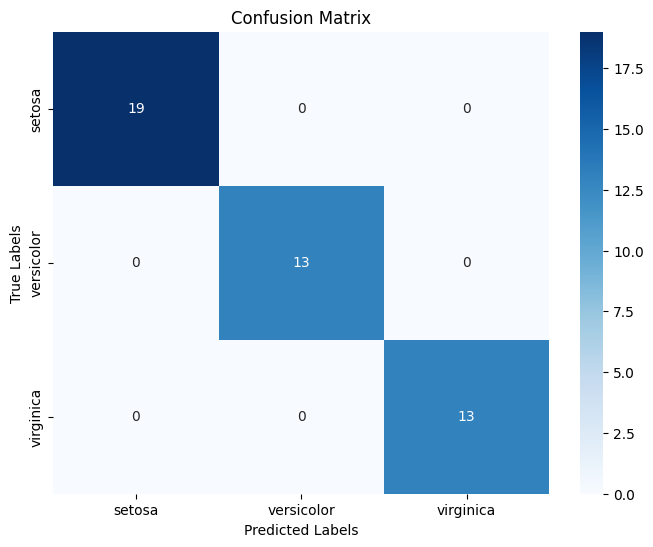

In [102]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [103]:
# Compute and print precision and recall
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))



Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [104]:
# Calculate precision and recall for each class
for i, class_name in enumerate(target_names):
    precision = precision_score(y_test, y_pred, labels=[i], average='micro')
    recall = recall_score(y_test, y_pred, labels=[i], average='micro')
    print(f"Class '{class_name}' - Precision: {precision:.2f}, Recall: {recall:.2f}")


Class 'setosa' - Precision: 1.00, Recall: 1.00
Class 'versicolor' - Precision: 1.00, Recall: 1.00
Class 'virginica' - Precision: 1.00, Recall: 1.00


In [105]:
# Analyze errors
false_positive = cm.sum(axis=0) - np.diag(cm)
false_negative = cm.sum(axis=1) - np.diag(cm)


In [106]:
print("\nError Analysis:")
for i, class_name in enumerate(target_names):
    print(f"Class '{class_name}' - False Positives: {false_positive[i]}, False Negatives: {false_negative[i]}")



Error Analysis:
Class 'setosa' - False Positives: 0, False Negatives: 0
Class 'versicolor' - False Positives: 0, False Negatives: 0
Class 'virginica' - False Positives: 0, False Negatives: 0
